# Classical Mechanics I (PHYS 311)
## Studio 4

*Name: Evan Toon*

*Date: 09-05-2025*

## Introduction

Today we'll:

* Start off with a short lecture today to cover some material I wanted to cover on Wednesday but ran out of time on.
* This studio starts to get a little more real world. The basics are required, but if you end up with extra time, we'll dive into some rudimentary particle collider physics for extra credit.

As always, let's start of with:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Today, we're going to be simulating the motion of charged particles through magnetic fields. They will of course be subject to the Lorentz force.

$$\vec{F} = q (\vec{E} + \vec{v}\times\vec{B})$$

We will assume there is no electric field, and that the magnetic field is purely in the $z$ direction, i.e. $\vec{B}=(0,0,Bz)$. So let's define a function where we give it a position in 3-space $(x,y,z)$, and it returns the $z$ component of the magnetic field at that location.

To keep things simple, let's start with a uniform $B$ field with a value of 1 everywhere. Since it's uniform, it's actually independent of position, so the function is super simple.

In [2]:
def Bz_uniform(x,y,z=0):
    """
    This is called a docstring and is good practice. It's meant to describe the code
    ... inside of this block.

    This function Bz_uniform is handed a position in 3D space in cartesean coordinates
    ... x,y,z. For each point in that 3D space, it returns the magnitude of a B field
    ... in the z direction. Here, this is a uniform B field of value 1. The return
    ... value is independent of x,y,z.

    Note that the z=0 notation means that z is an "optional argument" and if you don't
    ... provide it, it will default to a value of 0.

    Returns: 1, the z-value of the B field at (x,y,z)
    """
    return 1

In class, we came up with the equations of motion for a charged particle moving through a B field oriented in the z direction. Let's use those in `odeint`! Remember we have three (because we're in a 3D space now!) first order ODEs (in velocity):

$$\dot{v}_x = \frac{qB_z}{m} v_y$$
$$\dot{v}_y = -\frac{qB_z}{m} v_x$$
$$\dot{v}_z = 0$$

But we want to get to descriptions of the particle **trajectories**. So this means, getting the positions ($x,y,z$) as a function of time! So we want `odeint` to solve for the positions, but remember that it only handles systems of first order ODEs. So we want to also hand it expressions for the position!

$$\dot{x}=v_x$$
$$\dot{y}=v_y$$
$$\dot{z}=v_z$$

Let's plug this system into `odeint`:

In [3]:
from scipy.integrate import odeint

In [4]:
# remember that we need to write a function that takes in arguments
# ... a: input variables
# ... b: time or whatever the derivitive is with respect to
# ... c: any other parameters you might need. Here: m and q.
# ... Note that B is not taken as an input and is instead calculated inside the function.
# ... ... This is because we want the value of the B field to be able to change as the
# ... ... particle moves around in space as described by these ODEs.

def ode_system(inputs,t,m,q):
    """
    This function represents a series of first order ODEs of a charge particle of charge q and mass m
    ... moving in a magnetic field that is purely in the z direction.
    ... It internally uses Bz_simple() to define a *uniform* magnetic field.

    Return: List of expressions for the first time derivative of the inputs, in order.
    """

    # Parse the inputs list to positions x,y,z and vector magnitudes vx, vy, vz
    [x,y,z,vx,vy,vz] = inputs

    # The ODEs need the value of Bz at each point in time. We will use Bz_uniform to obtain this value.
    B = Bz_uniform(x,y,z)

    # Return the expressions for the time-derivatives of the inputs.
    return [vx,vy,vz,vy*q*B/m,-vx*q*B/m,0]

Remember that the return value should be expressions for the time derivatives of the input variables. These are the right hand sides (RHS) of the equations above.

Great! So let's try to use `odeint` now to solve for the trajectory of a charged particle starting from the origin $(0,0,0)$ and traveling with a velocity in the $\hat{x}$ direction. Since we're in 3D now, let's pull in a new special tool for plotting 3D things.

In [5]:
from mpl_toolkits import mplot3d


So let's use this. Define a time range `t_array` between 0 and 2, with 100 steps (using `linspace`).

In [6]:
t_array = np.linspace(0, 2, 100)

(-10.0, 10.0)

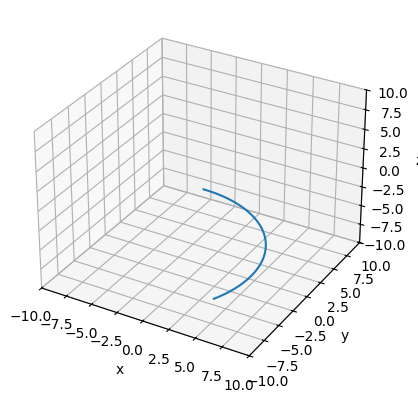

In [7]:
solutions = odeint(ode_system, (0,0,0,10,0,0), t_array, args=(1,1))
# second argument for odeint is initial values of (x,y,z,vx,vy,vz)
# Let's also start off easy with a mass and charge of 1

# We create 3D axes for plotting
ax=axes(projection="3d")
# Then hand X,Y,Z arrays to the `plot3D` function. That's the 1st, 2nd, 3rd columns.
ax.plot3D(solutions[:,0],solutions[:,1],solutions[:,2])

# Beautify with the following lines... (google is your friend)
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
ax.set_xlim3d(-10,10); ax.set_ylim3d(-10,10); ax.set_zlim3d(-10,10)

That's a nice looking particle track. Comment on the shape below:

The shape of the particle's path is smooth, symmetric, and circular. Just as we expect from the Lorentz Force in a uniform magnetic field


Below, do this again, but for a particle with charge -1 and mass 2, and describe the differences from the plot above.

(-10.0, 10.0)

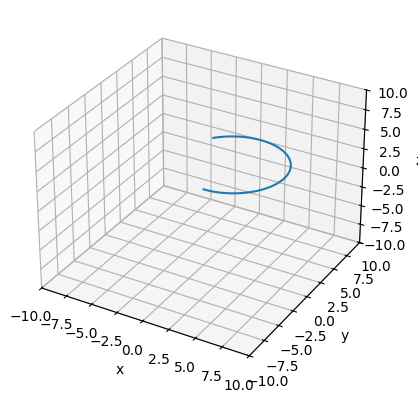

In [8]:
solutions = odeint(ode_system, (0,0,0,10,0,0), t_array, args=(-1,2))
# second argument for odeint is initial values of (x,y,z,vx,vy,vz)
# Let's also start off easy with a mass and charge of 1

# We create 3D axes for plotting
ax=axes(projection="3d")
# Then hand X,Y,Z arrays to the `plot3D` function. That's the 1st, 2nd, 3rd columns.
ax.plot3D(solutions[:,0],solutions[:,1],solutions[:,2])

# Beautify with the following lines... (google is your friend)
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
ax.set_xlim3d(-10,10); ax.set_ylim3d(-10,10); ax.set_zlim3d(-10,10)

The path of the particle seems to be a much tighter circle than before (smaller diameter), and the path seems to be transformed up on the z axis

**EC(+0.5): Below, make a new cell here and increase the time range explored and show that you reproduce the circular path discussed in class. Then give it some non-zero z velocity, and reproduce the helix discussed in class.**

(-10.0, 10.0)

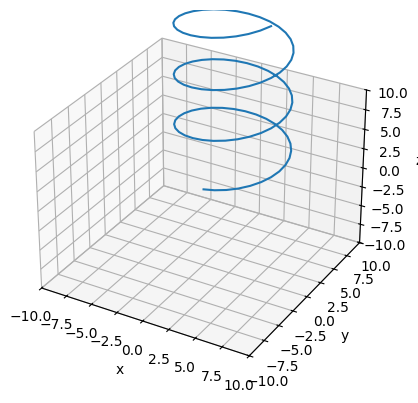

In [9]:
t_array = linspace(0,10,100)

solutions = odeint(ode_system, (0,0,0,10,0,2), t_array, args=(-1,2))
# second argument for odeint is initial values of (x,y,z,vx,vy,vz)
# Let's also start off easy with a mass and charge of 1

# We create 3D axes for plotting
ax=axes(projection="3d")
# Then hand X,Y,Z arrays to the `plot3D` function. That's the 1st, 2nd, 3rd columns.
ax.plot3D(solutions[:,0],solutions[:,1],solutions[:,2])

# Beautify with the following lines... (google is your friend)
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
ax.set_xlim3d(-10,10); ax.set_ylim3d(-10,10); ax.set_zlim3d(-10,10)

## More complex B field
Now let's try to make this more realistic... Let's define a B-field (again in the z direction) that is more complex, and depends on the cylindrical radius ($\rho$). We're going to use a special function called the error function for fun. Start off by plotting the function `special.erf(x)` as a function of `x`.

Text(0, 0.5, 'erf(x)')

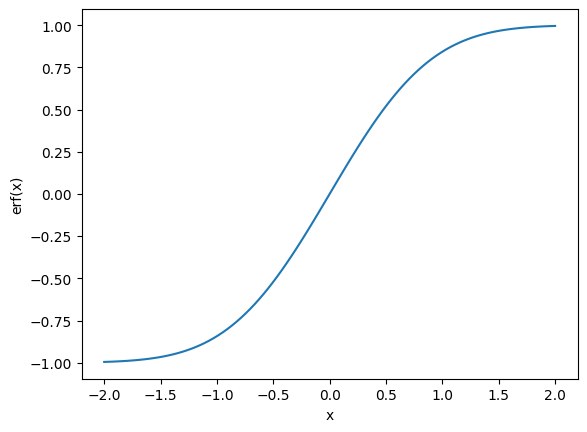

In [10]:
from scipy import special
# Create an x linspace and then plot special.erf(x) vs x.

x = linspace(-2,2,100)
y = special.erf(x)

plt.plot(x, y, label="erf(x)")
plt.xlabel("x")
plt.ylabel("erf(x)")

You should see that the error function is constructed so that it flips sign for positive vs negative and has a smooth behavior in the transition region. Let's construct a B field function now...

In [11]:
from scipy import special
def Bz_collider(x,y,z=0):
    rho = np.sqrt(x*x+y*y) # This is the cylindrical radius rho
    # And then we return some complicated function of rho
    return 5*special.erf(rho-5)*np.exp(-rho/5.)


Plot the value of `Bz_collider` as you go along the x axis. (Holding y and z at 0.) Make sure that you give a range that allows you to see all the dynamic behavior of the function.

Text(0, 0.5, 'Bz')

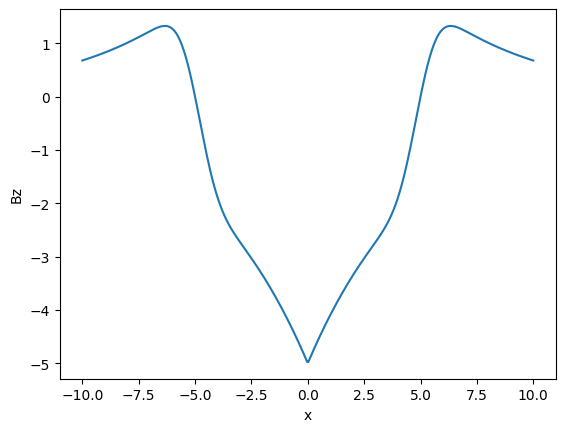

In [12]:
x = linspace(-10, 10, 400)
Bz = Bz_collider(x, 0)

plt.plot(x, Bz, label=r"$B_z(x,0,0)$")
plt.xlabel("x")
plt.ylabel("Bz")

This has some of the qualitative features of the magnetic fields used in collider experiments such as those at the LHC (at CERN) or at RHIC (at Brookhaven National Lab).

Just like above, let's define an ODE system using this new B-field parametrization. And then simulate a particle going through it!

In [13]:
def ode_system_collider(inputs,t,m,q):
    """
    This function represents a series of first order ODEs of a charge particle of charge q and mass m
    ... moving in a magnetic field that is purely in the z direction.
    ... It internally uses Bz_simple() to define a *uniform* magnetic field.

    Return: List of expressions for the first time derivative of the inputs, in order.
    """

    # Parse the inputs list to positions x,y,z and vector magnitudes vx, vy, vz
    [x,y,z,vx,vy,vz] = inputs

    # The ODEs need the value of Bz at each point in time. We will use Bz_simple to obtain this value.
    B = Bz_collider(x,y,z)

    #     NOTICE THAT THE B FIELD FUNCTION HAS CHANGED!!!

    # Return the expressions for the time-derivatives of the inputs.
    return [vx,vy,vz,vy*q*B/m,-vx*q*B/m,0]

And then let's use this to again simulate a particle travelling in the x direction... Use the example from the uniform B field above! (There should only be one change w.r.t. that example to do this!)

(-10.0, 10.0)

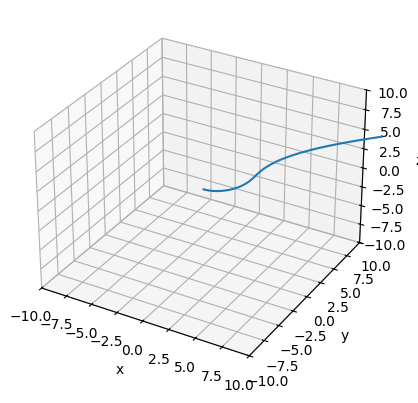

In [14]:
x = linspace(0,2,100)

solutions = odeint(ode_system_collider, (0,0,0,10,0,0), x, args=(1,1))
# second argument for odeint is initial values of (x,y,z,vx,vy,vz)
# Let's also start off easy with a mass and charge of 1

# We create 3D axes for plotting
ax=axes(projection="3d")
# Then hand X,Y,Z arrays to the `plot3D` function. That's the 1st, 2nd, 3rd columns.
ax.plot3D(solutions[:,0],solutions[:,1],solutions[:,2])

# Beautify with the following lines... (google is your friend)
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
ax.set_xlim3d(-10,10); ax.set_ylim3d(-10,10); ax.set_zlim3d(-10,10)


Describe the trajectory of this particle. Why does it look the way it does?

The particle moves in a tight, circular path around the x-axis because there are no $v_y$ or $v_z$ components

Now do the same thing but give the particle an initial velocity of (10,10,10)! And then comment on what you observe and why it has the behavior it has. Compared to the plot above, this should only be a change in the initial conditions of the problem that are handed to `odeint`.

(-10.0, 10.0)

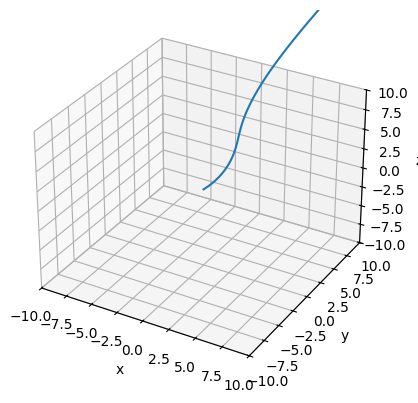

In [15]:
solutions = odeint(ode_system_collider, (0,0,0,10,10,10), x, args=(1,1))
# second argument for odeint is initial values of (x,y,z,vx,vy,vz)
# Let's also start off easy with a mass and charge of 1

# We create 3D axes for plotting
ax=axes(projection="3d")
# Then hand X,Y,Z arrays to the `plot3D` function. That's the 1st, 2nd, 3rd columns.
ax.plot3D(solutions[:,0],solutions[:,1],solutions[:,2])

# Beautify with the following lines... (google is your friend)
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
ax.set_xlim3d(-10,10); ax.set_ylim3d(-10,10); ax.set_zlim3d(-10,10)


## EC(+1.5): Build a rudimentary Monte Carlo simulation for colliders

For a whole lot of EC this week, I'll walk you through a basic Monte Carlo (MC) simulation where we randomly draw particle properties from assumed distributions and them send them into this kind of magnetic field, much in the way particle collisions at colliders look like. I promise there are a lot of hints, so if you have the time, give it a shot! This one's cool.

Let's start off with some **pseudocode**. Pseudocode is when you map out the logic of what you want to do before you actually implement it! We're going to draw values for the velocity components at random from an underlying distribution, so assume we have a function for that. And let's also assume we'll randomly pick if the particle should be positively charged or negatively charged (let's restrict outselves to +1 and -1 charge for now). And let's also select the mass at random from a list of a few values.

And the key is that we want to repeat this process 100 times to send 100 different particles with different properties into this magnetic field. So we should have some sort of loop that will solve the ODEs given a set of parameters, where the parameters change with each iteration of the loop. And for each iteration of the loop, we should add another path to our 3D plot.

This week, I'll write the pseudocode for you, and you implement the actual code. When working on the homeworks, try writing out pseudocode to organize your thoughts before implementing in real code!

Some pseudo code:

```
Create a 3D axis.
Repeat a process 100 times to produce 100 different particles:

    Draw random numbers for the initial velocity components from a distribution
    Draw random number from [-1,1] for the charge
    Draw random number from a few possible masses from [0.135, 0.497, 0.775]

    Hand these parameters to odeint as constants of the problem.
    Call the plot3D to create a curve.

Label the axes, and set the axis ranges all to -10,10.
```

Now we have some pseudocode to guide us. Some hints:
* For the loop, just use a `for` loop over the object `range(100)`. That will execute the inside 100 times.
* For getting the initial velocity components, let's just set all components to `normal(0,10)`. This is a normal (i.e. Gaussian) distribution centered at 0 with a width of 10.
* To get a random charge sampling, you can use `sign(normal(0,1))` which will give you the sign of the value returned by `normal`.
* For choosing a mass randomly from that list, try out `random.choice([0.135,0.497,0.775])`.

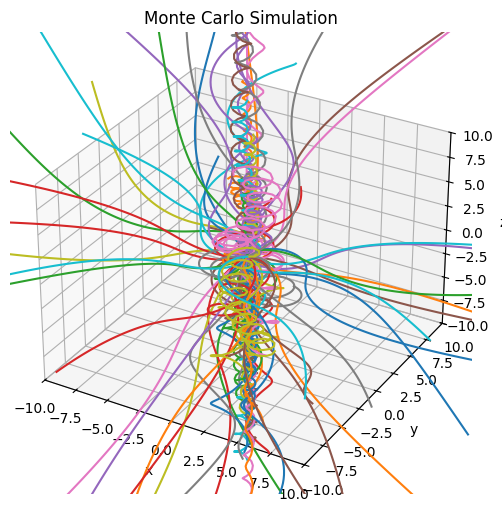

In [16]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection="3d")
t_array = linspace(0,2,100)

for i in range(100):
    vx = np.random.normal(0, 10)
    vy = np.random.normal(0, 10)
    vz = np.random.normal(0, 10)

    m = random.choice([0.135, 0.497, 0.775])

    q = np.sign(np.random.normal(0, 1))
    if q == 0:  # boundary case if q == 0
        q = 1

    initial_conditions = (0, 0, 0, vx, vy, vz)

    solutions = odeint(ode_system_collider, initial_conditions, t_array, args=(m, q))

    ax.plot3D(solutions[:, 0], solutions[:, 1], solutions[:, 2])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xlim3d(-10, 10)
ax.set_ylim3d(-10, 10)
ax.set_zlim3d(-10, 10)
plt.title("Monte Carlo Simulation")
plt.show()

Let's do it again to make a x-y projection of this space so that it's a little easier to see. To do this, let's make an ordinary (not 3d) plot of the x and y positions of the particles instead. (We're collapsing the z dimension down to do this!)

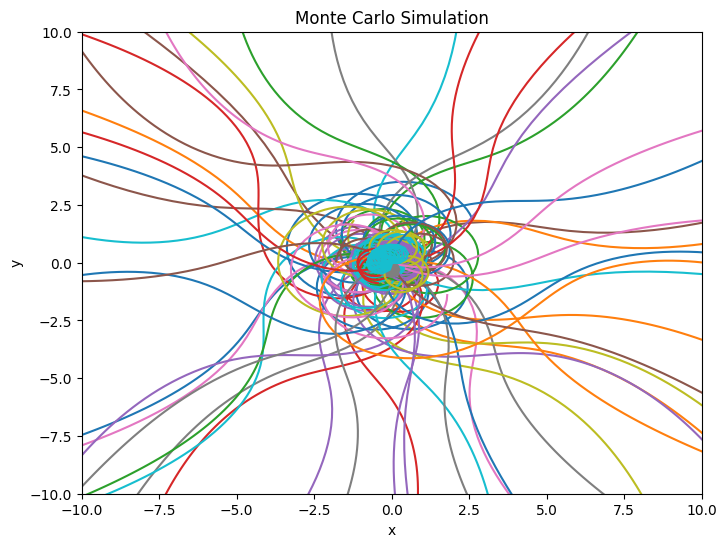

In [17]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
t_array = np.linspace(0, 2, 100)

for i in range(100):
    vx = np.random.normal(0, 10)
    vy = np.random.normal(0, 10)
    vz = np.random.normal(0, 10)

    m = random.choice([0.135, 0.497, 0.775])

    q = np.sign(np.random.normal(0, 1))
    if q == 0:
        q = 1

    initial_conditions = (0, 0, 0, vx, vy, vz)

    solutions = odeint(ode_system_collider, initial_conditions, t_array, args=(m, q))

    ax.plot(solutions[:, 0], solutions[:, 1])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.title("Monte Carlo Simulation")
plt.show()


Trippy, right? You can see what a mess these collisions are once there are a bunch of particles. At modern colliders, we spend a lot of time trying to piece together what happened in the collision from a mess of outgoing particles like this. Play with the number of particles and the line style to make a personal work of art out of these collisions!

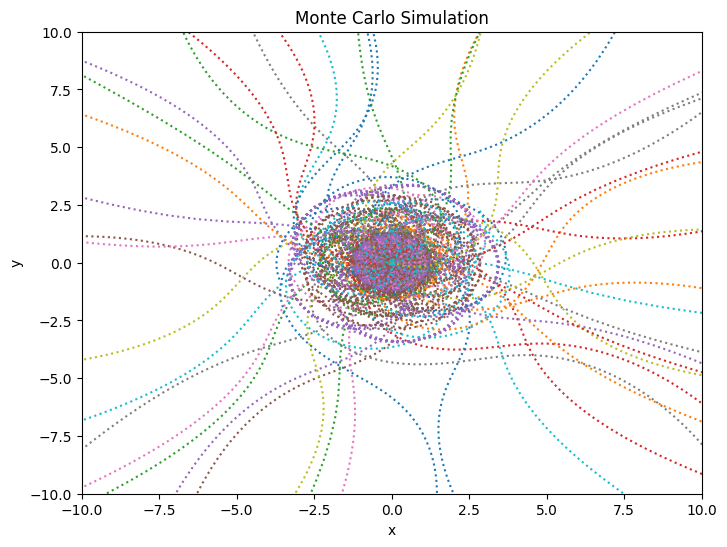

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
t_array = np.linspace(0, 5, 200)

for i in range(100):
    vx = np.random.normal(0, 15)
    vy = np.random.normal(0, 10)
    vz = np.random.normal(0, 5)

    m = random.choice([0.135, 0.497, 0.775])

    q = np.sign(np.random.normal(0, 1))
    if q == 0:
        q = 1

    initial_conditions = (0, 0, 0, vx, vy, vz)

    solutions = odeint(ode_system_collider, initial_conditions, t_array, args=(m, q))

    ax.plot(solutions[:, 0], solutions[:, 1], linestyle=':')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.title("Monte Carlo Simulation")
plt.show()

I didn't mention it above, but if you run the command `%matplotlib notebook`, when you plot the 3D axes, you'll be able to move around and change the perspective, which can be fun especially for these collision event plots. These are what we refer to in particle physics as "Event Displays"